# Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [272]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [273]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [274]:
df.shape 

(614, 13)

In [275]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [276]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [277]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Finding Missing Values

In [279]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

some features like Gender,Dependents,Self-Employed,LoanAmount,Loan_Amount_Term,Credit_History have missing values.

<Axes: >

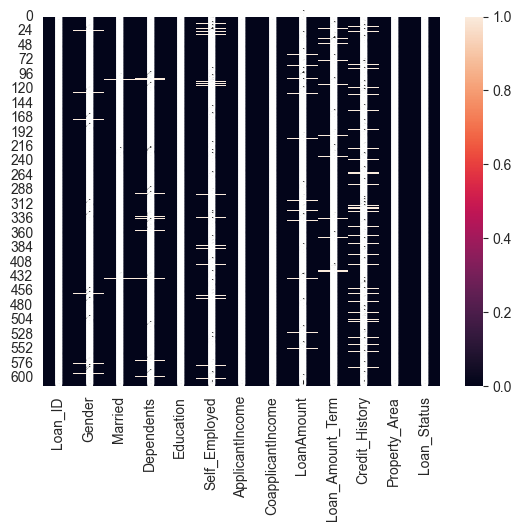

In [280]:
sns.heatmap(df.isnull(),annot=True)

In [281]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

so, now we have removed all the missing values.

In [282]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [283]:
df.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001002  Male    No       0           Graduate      No             5849             0.0                128.0       360.0             1.0             Urban          Y              1
LP002328  Male    Yes      0           Not Graduate  No             6096             0.0                218.0       360.0             0.0             Rural          N              1
LP002305  Female  No       0           Graduate      No             4547             0.0                115.0       360.0             1.0             Semiurban      Y              1
LP002308  Male    Yes      0           Not Graduate  No             2167             2400.0             115.0       360.0             1.0             Urban          Y              1
LP002314  Female  No       0           Not Graduate  No             2213             0.0       

In [284]:
df.shape

(614, 13)

# Statistical Analysis

In [285]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


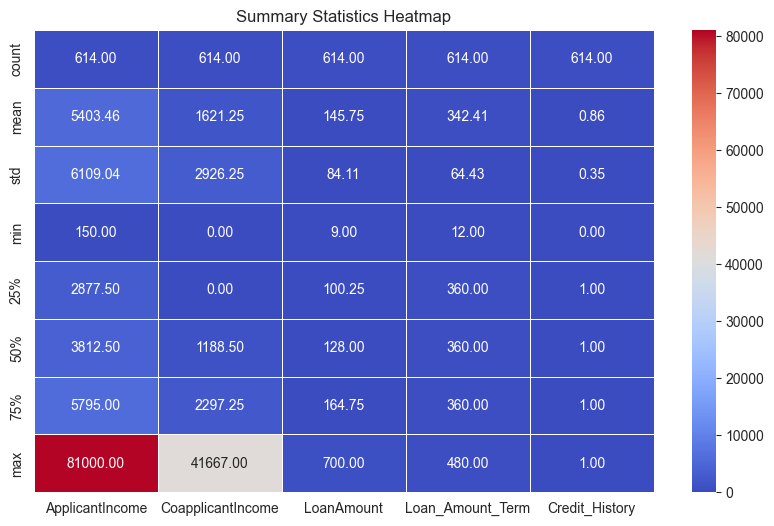

In [286]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.describe(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Summary Statistics Heatmap")
plt.show()

# Exploratory Data Analysis

In [287]:
numerical_features = df.select_dtypes(include=['number'])
categorical_features = df.select_dtypes(exclude=['number'])

# Display the lists of numerical and categorical features
print("Numerical Features:")
print(list(numerical_features.columns))

print("\nCategorical Features:")
print(list(categorical_features.columns))

Numerical Features:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Categorical Features:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [288]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [289]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

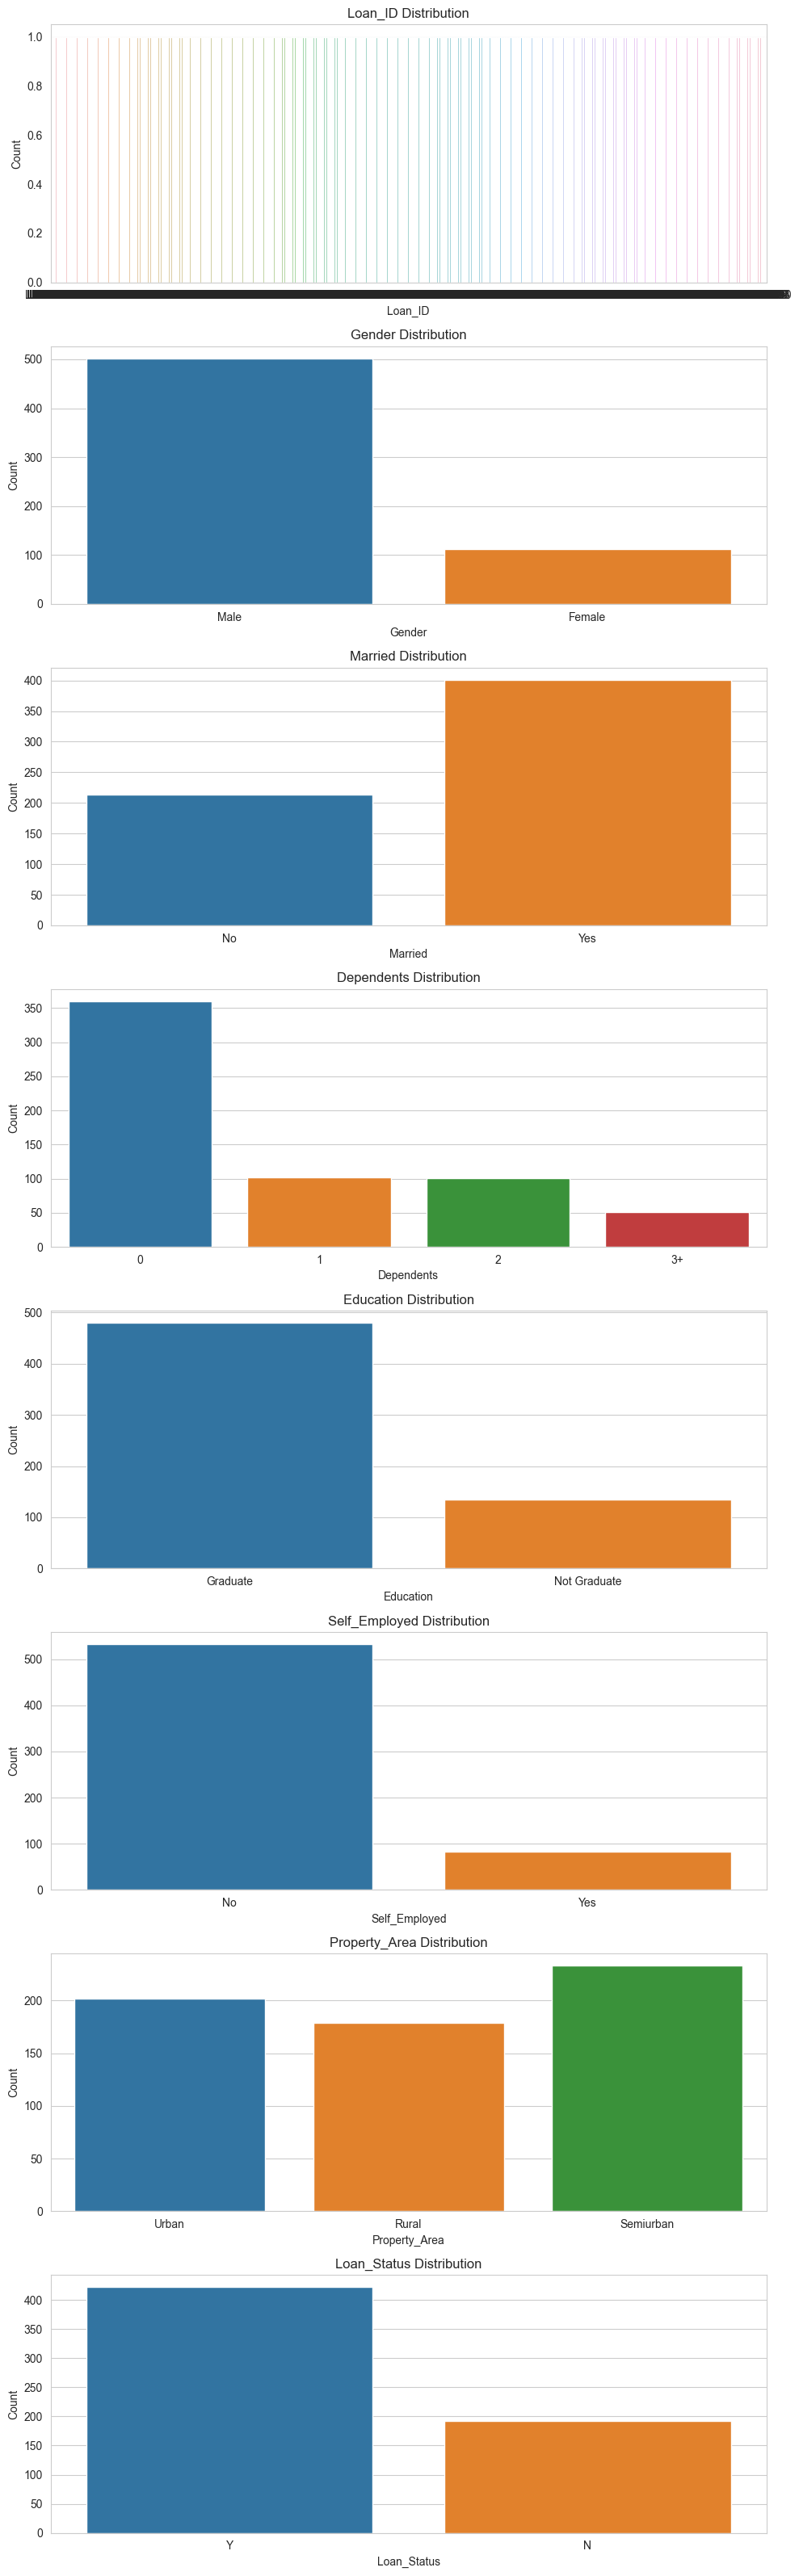

In [290]:
categorical_features = df.select_dtypes(include=['object'])

# Set up subplots for categorical features
num_features = len(categorical_features.columns)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 4 * num_features))

# Create subplots for each categorical feature
for i, col in enumerate(categorical_features.columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

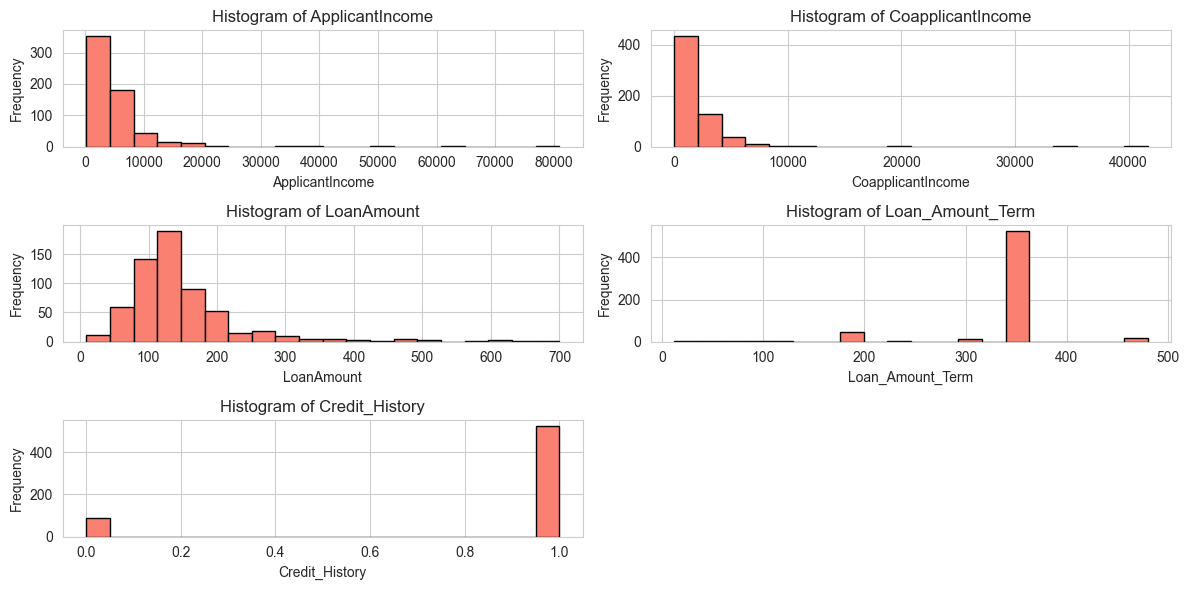

In [291]:

numerical_features = df.select_dtypes(include=['number'])

# Create histograms for numerical features
num_features = len(numerical_features.columns)
num_rows = (num_features + 1) // 2  # Adjust the number of rows for subplots

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, 2, i + 1)
    plt.hist(df[col], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


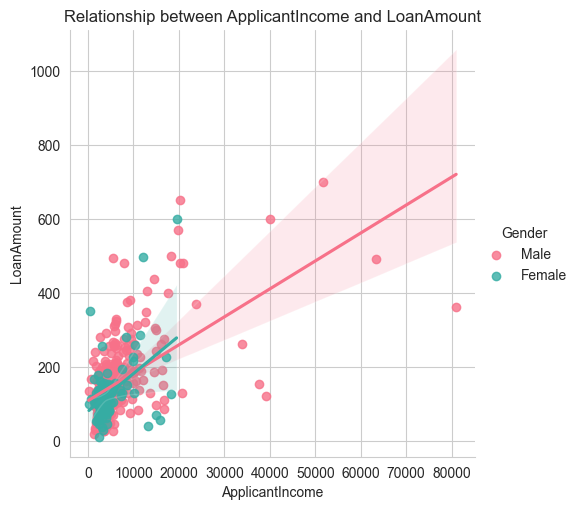

In [292]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount',hue='Gender',palette='husl', data=df)

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Relationship between ApplicantIncome and LoanAmount')

plt.show()


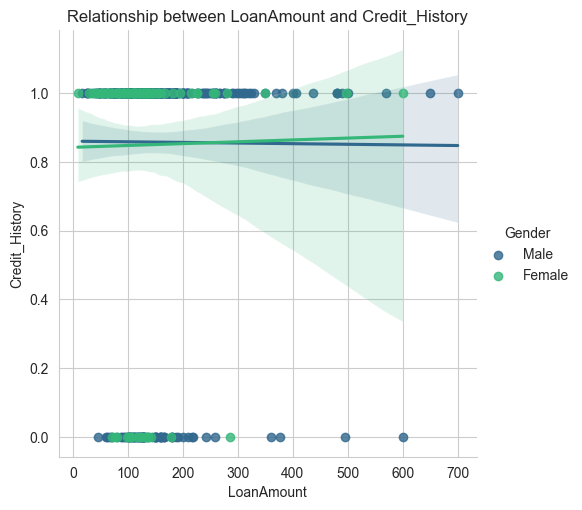

In [293]:
sns.lmplot(x='LoanAmount', y='Credit_History',hue='Gender',palette='viridis', data=df)

plt.xlabel('LoanAmount')
plt.ylabel('Credit_History')
plt.title('Relationship between LoanAmount and Credit_History')

plt.show()

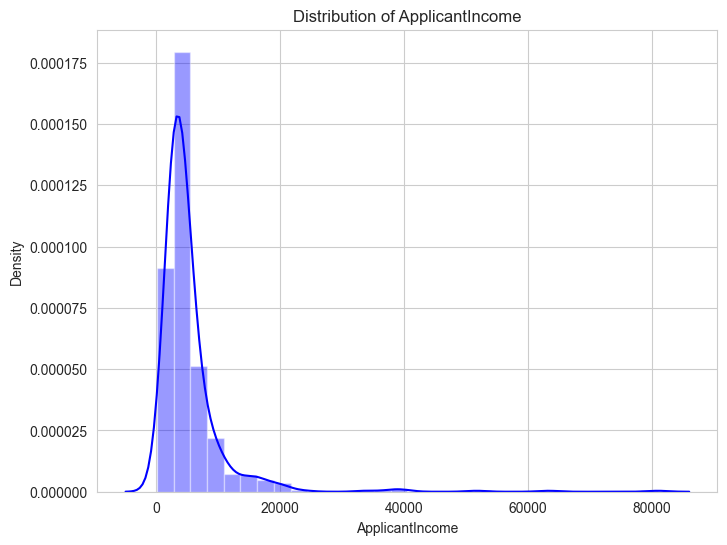

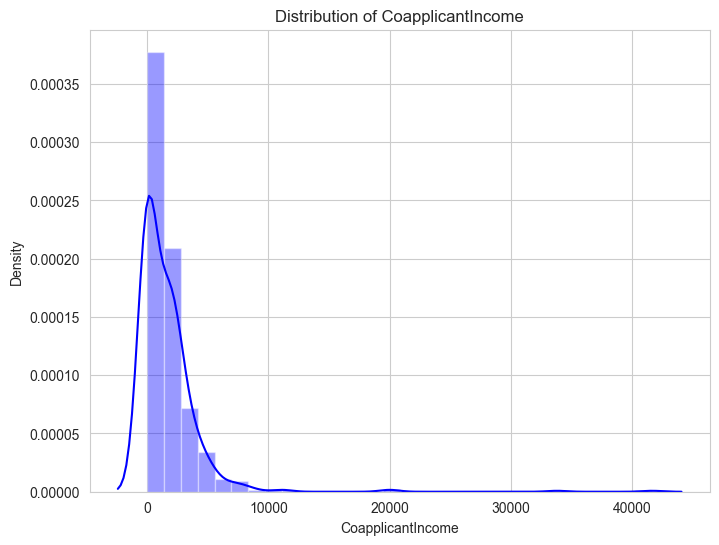

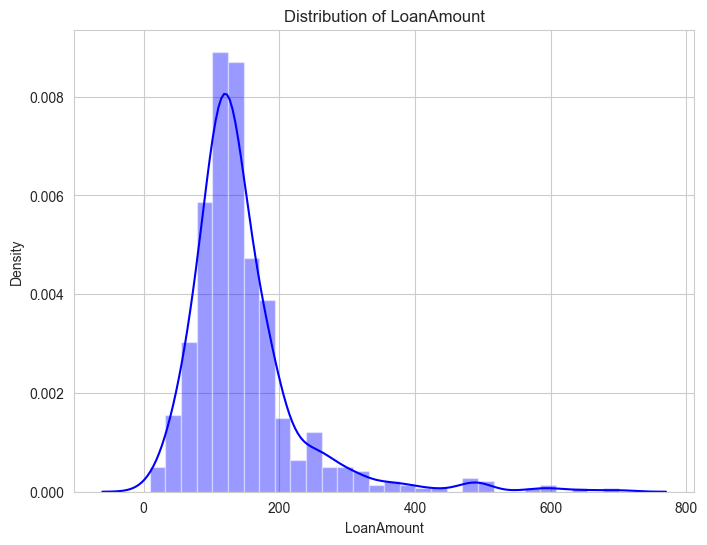

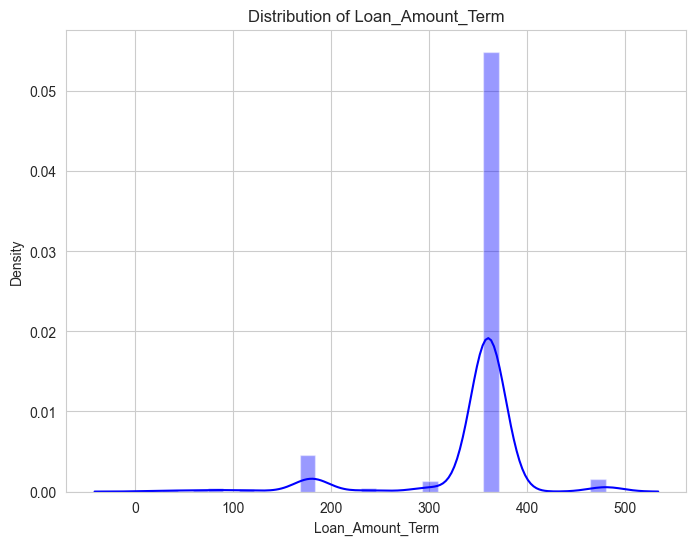

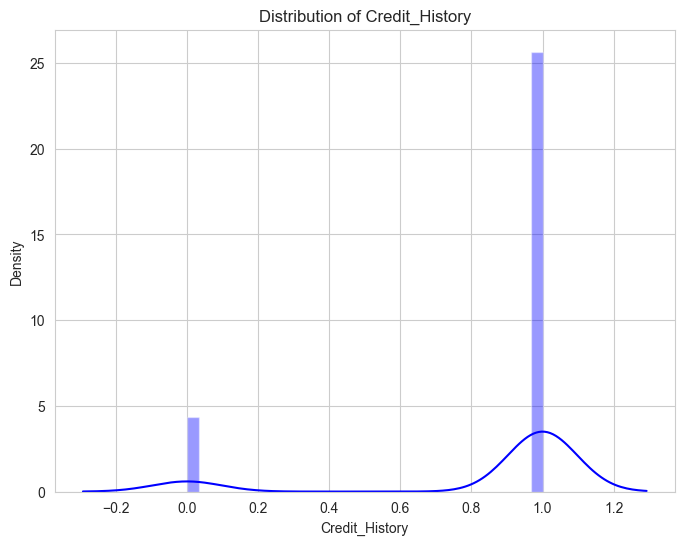

In [294]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

sns.set_style("whitegrid")

for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], bins=30, kde=True, color='blue')
    
    
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Distribution of {column}')
    
    
    plt.show()

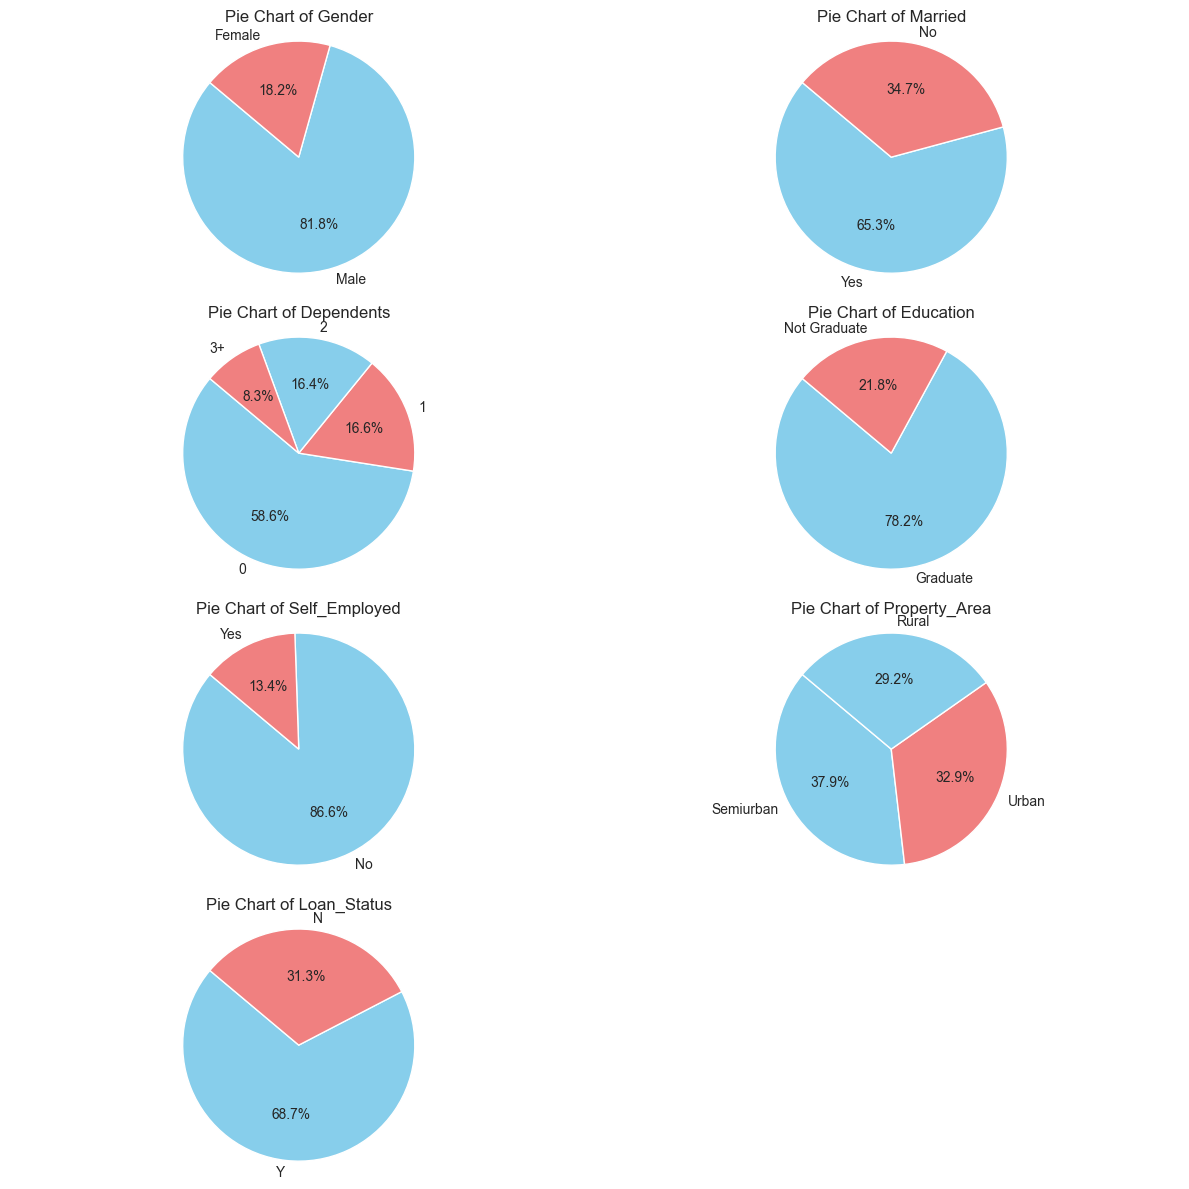

In [295]:
categorical_variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Set up subplots for pie charts
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(categorical_variables) + 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical variables and create pie charts
for i, cat_var in enumerate(categorical_variables):
    category_counts = df[cat_var].value_counts()
    ax = axes[i]  # Select the current axis
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,
           colors=['skyblue', 'lightcoral'])
    ax.set_title(f'Pie Chart of {cat_var}')
    ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Hide any remaining empty subplots
for j in range(len(categorical_variables), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the pie charts
plt.show()


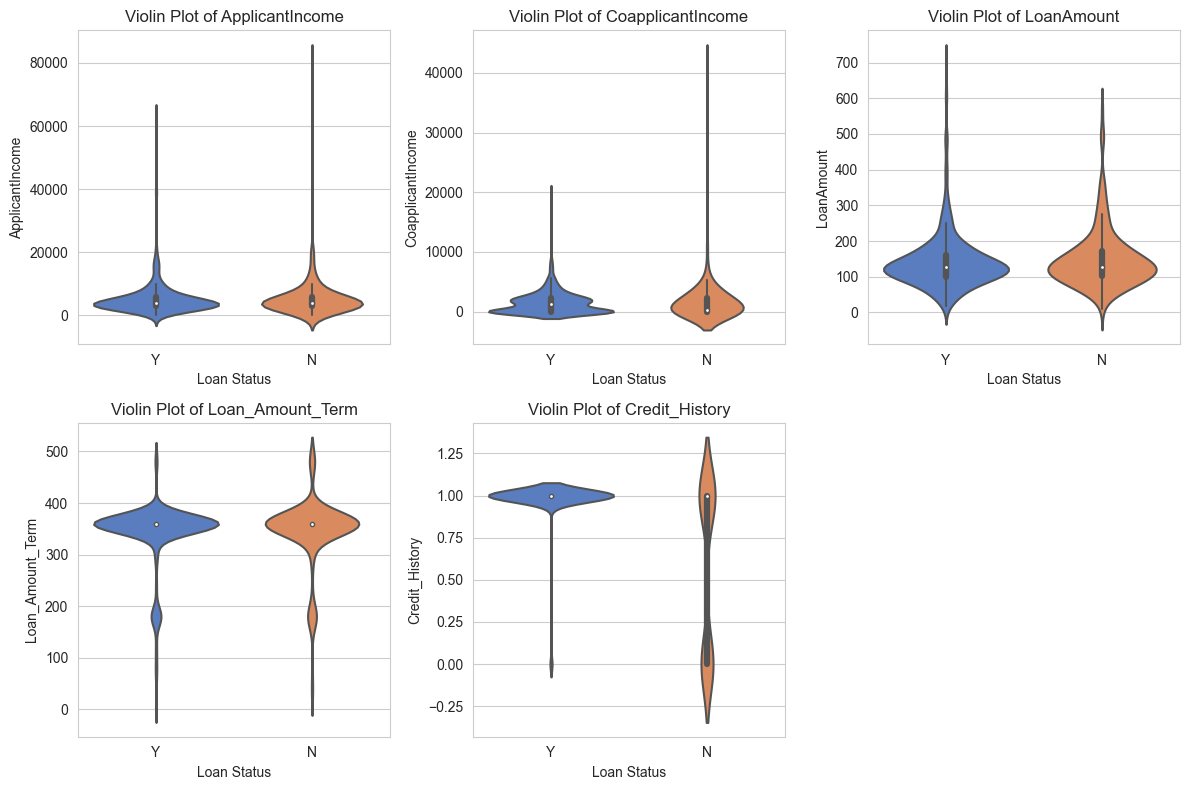

In [296]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create a violin plot for each numerical feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Loan_Status', y=feature, data=df, palette="muted")
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


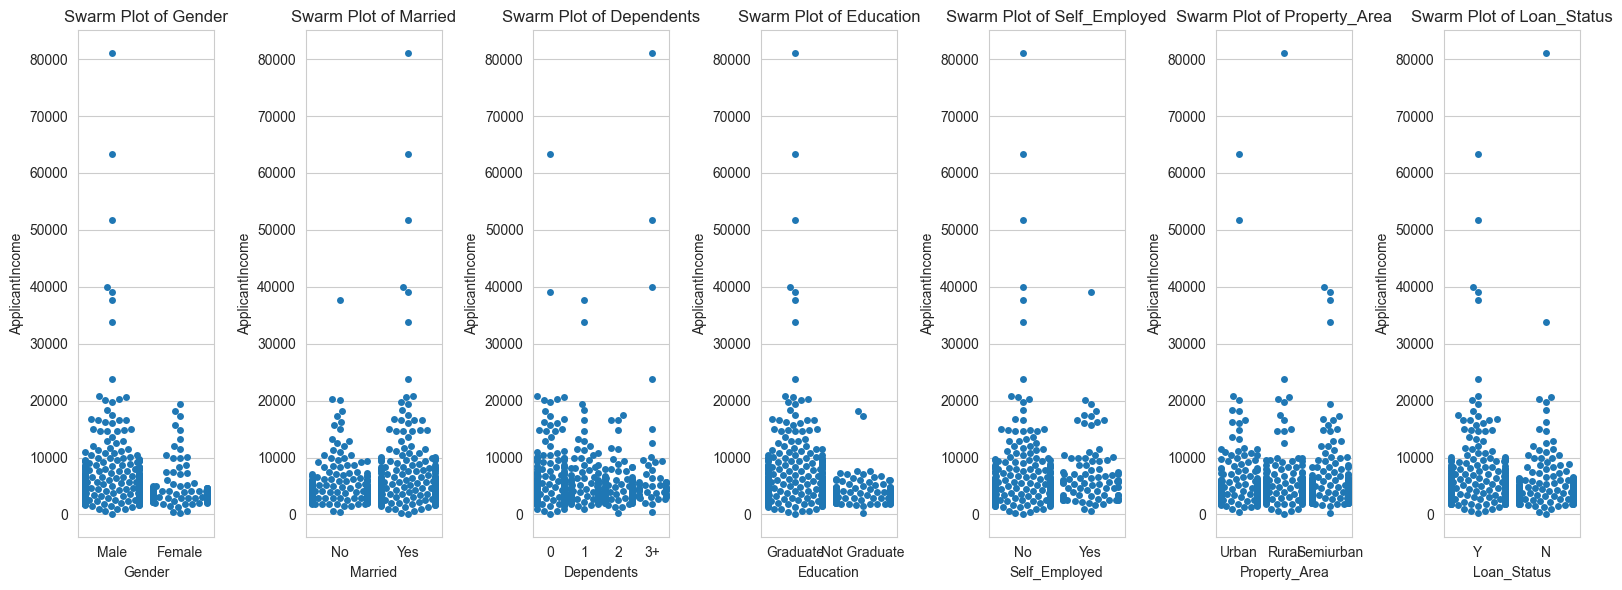

In [297]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Create subplots for swarm plots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(16, 6))

for i, feature in enumerate(categorical_features):
    sns.swarmplot(data=df, x=feature, y='ApplicantIncome', ax=axes[i])
    axes[i].set_title(f'Swarm Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('ApplicantIncome')

plt.tight_layout()
plt.show()


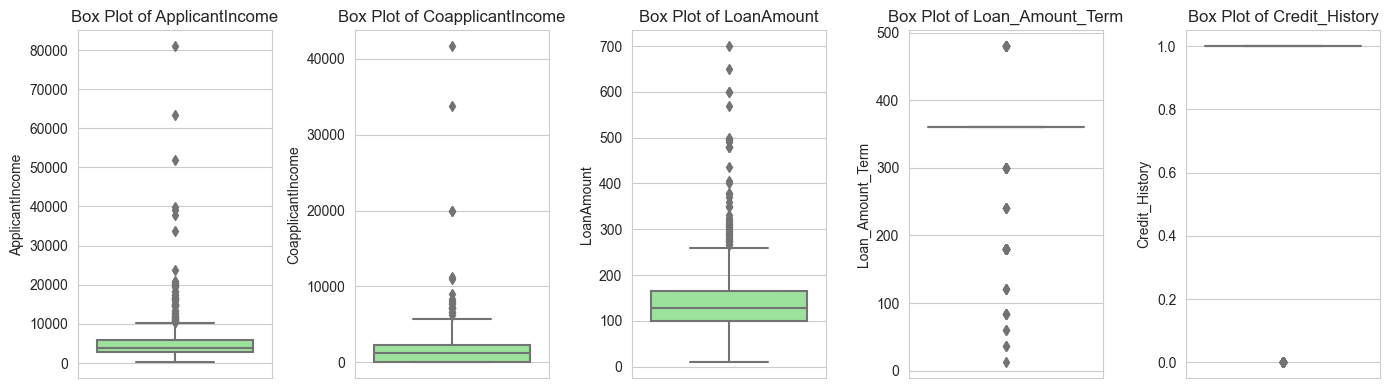

In [298]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(14, 4))

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


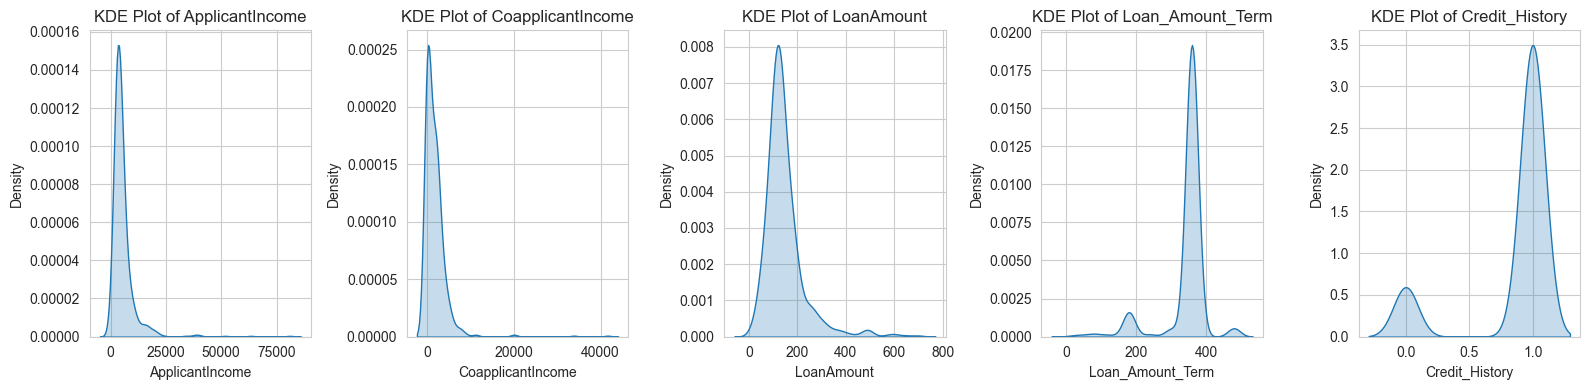

In [299]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create subplots for KDE plots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(16, 4))

for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=df, x=feature, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()


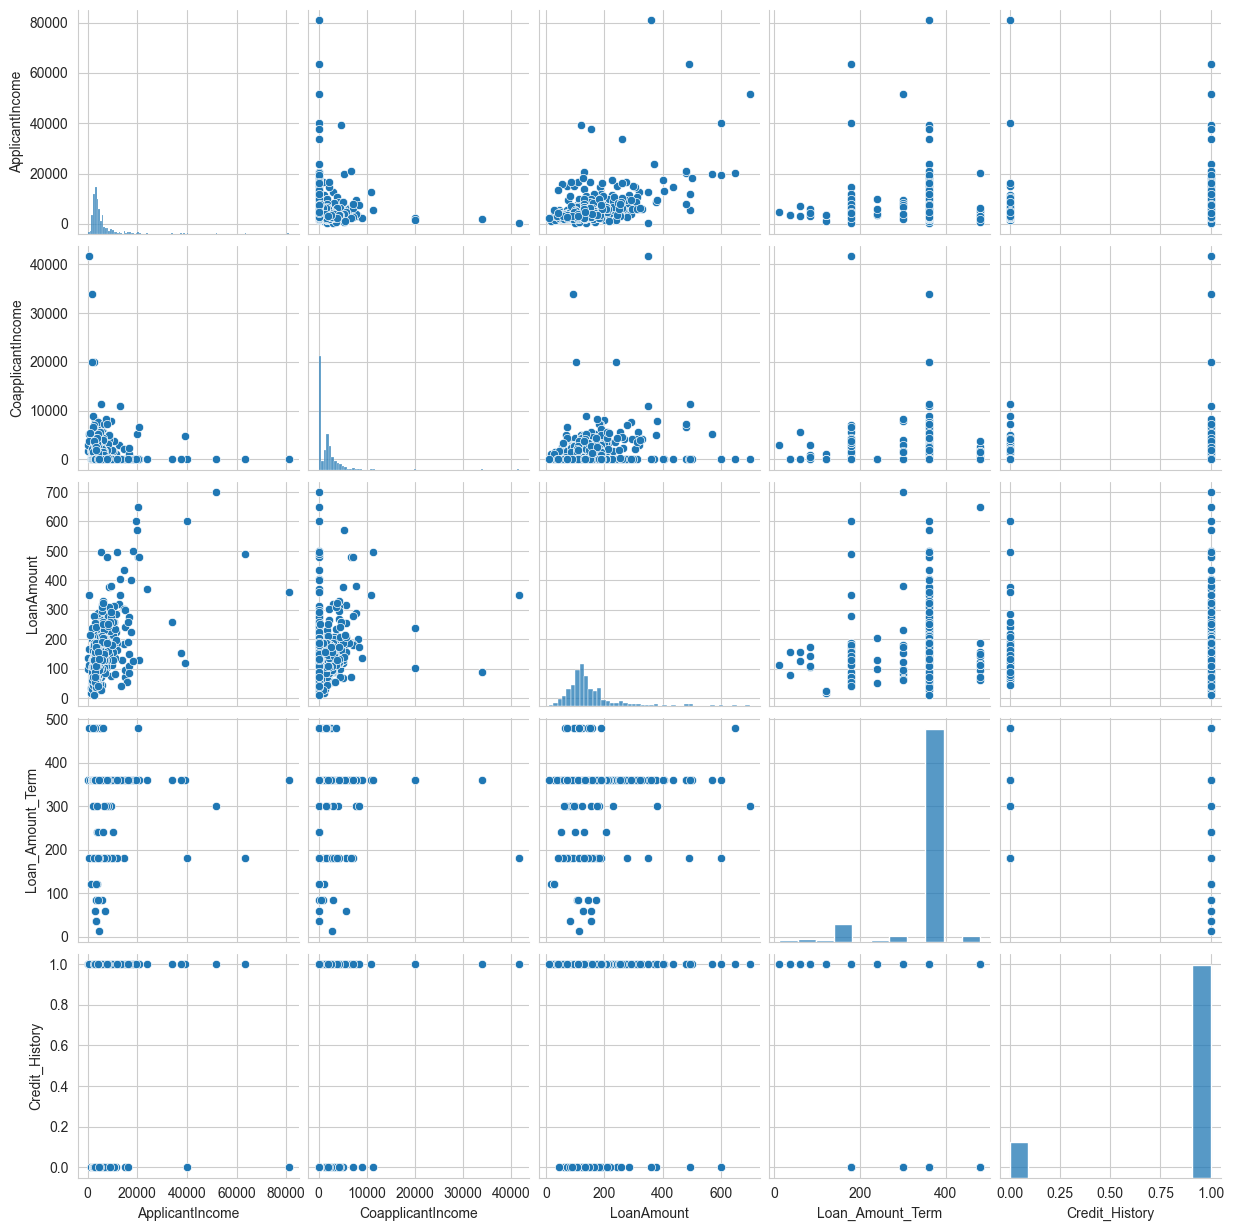

In [300]:
sns.pairplot(df)

# Encoding Categorical Data

In [301]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [302]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Outlier Detection and Removal

In [303]:
df.shape

(614, 13)

In [304]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [305]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [306]:
df.shape

(614, 12)

In [307]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [308]:
df1.shape

(577, 12)

In [309]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

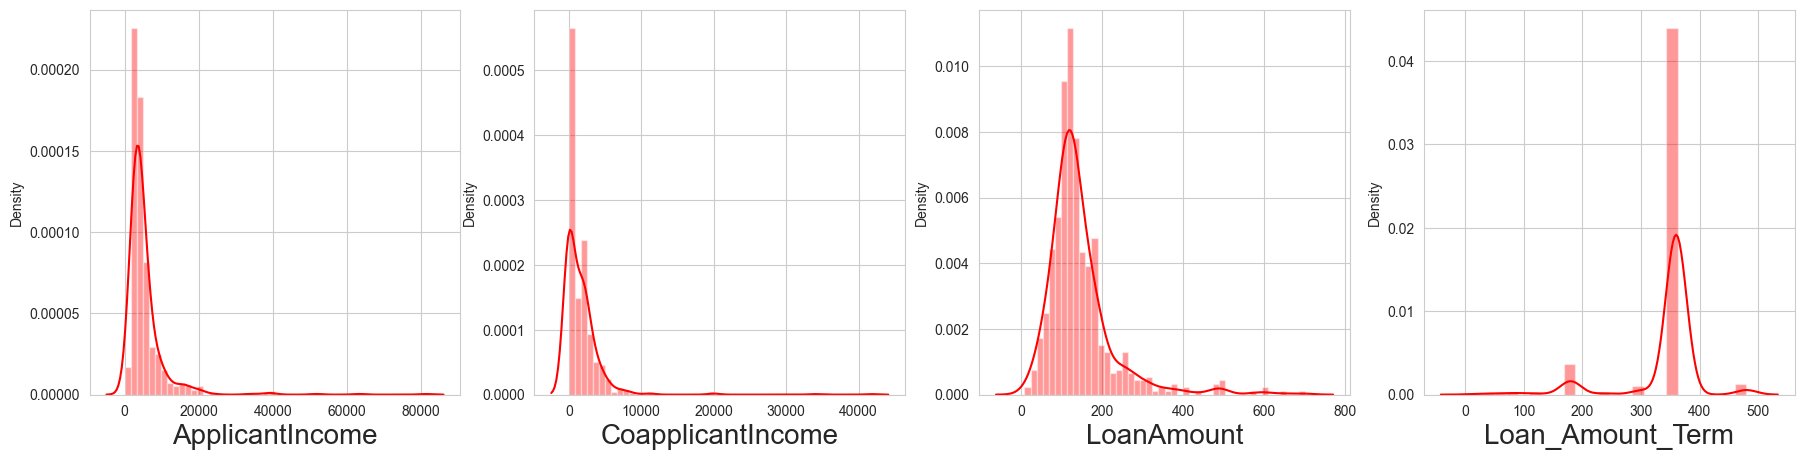

In [310]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in numerical_features:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [311]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


<Axes: >

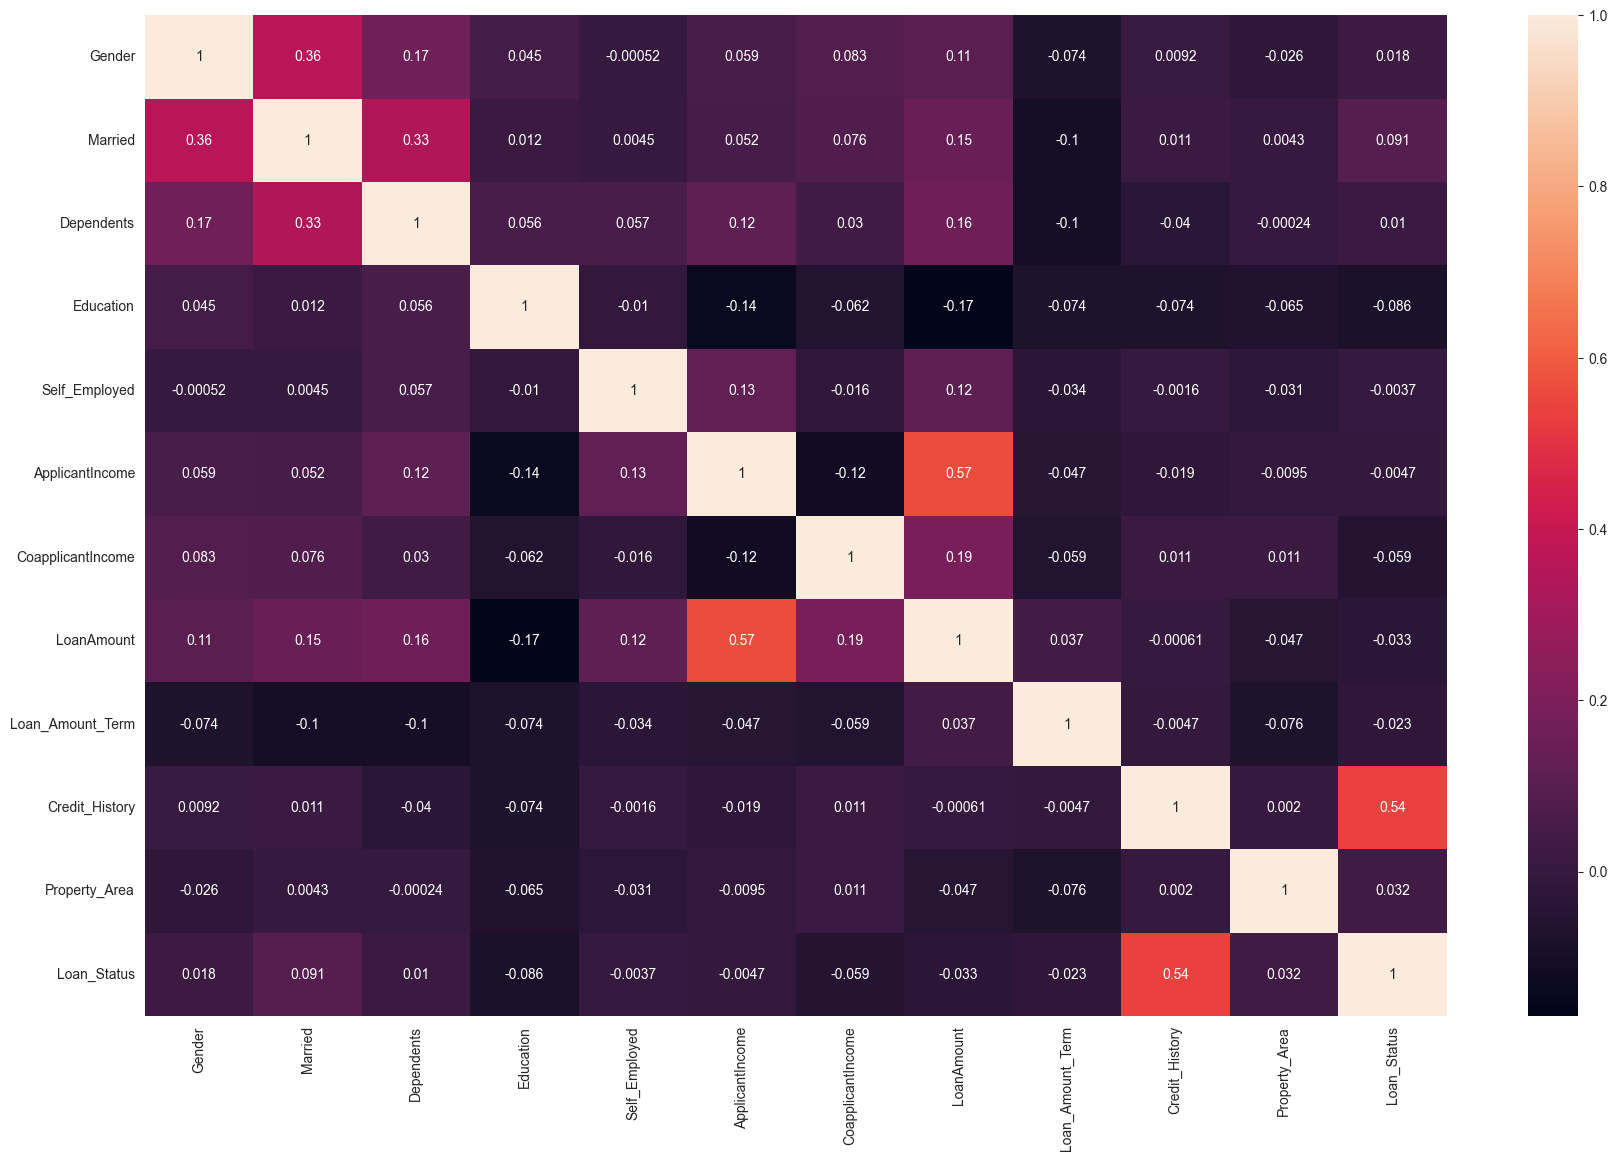

In [313]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(),annot=True)

# Checking Multicollinearity between features using variance_inflation_factor


In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.002526,Gender
1,3.697000,Married
2,1.792506,Dependents
3,1.311451,Education
4,1.176623,Self_Employed
5,2.888730,ApplicantIncome
6,1.489371,CoapplicantIncome
7,6.814872,LoanAmount
8,10.325040,Loan_Amount_Term
9,9.071987,Credit_History


In [315]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Balancing Imbalanced target variable using smote 

In [316]:
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [317]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Standard Scaling

In [318]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [331]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)

In [332]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
predictions = lg.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7165354330708661
[[ 75  57]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.83      0.57      0.68       132
           1       0.65      0.88      0.75       122

    accuracy                           0.72       254
   macro avg       0.74      0.72      0.71       254
weighted avg       0.75      0.72      0.71       254



In [333]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
predRFC = RFC.predict(X_test)
print(accuracy_score(Y_test, predRFC))
print(confusion_matrix(Y_test, predRFC))
print(classification_report(Y_test, predRFC))

0.7795275590551181
[[ 91  41]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.76       132
           1       0.72      0.88      0.79       122

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.79      0.78      0.78       254



In [334]:
GB = GradientBoostingClassifier()
GB.fit(X_train,Y_train)
predGB= GB.predict(X_test)
print(accuracy_score(Y_test, predGB))
print(confusion_matrix(Y_test, predGB))
print(classification_report(Y_test, predGB))

0.7677165354330708
[[ 88  44]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       132
           1       0.71      0.88      0.78       122

    accuracy                           0.77       254
   macro avg       0.78      0.77      0.77       254
weighted avg       0.78      0.77      0.77       254



In [335]:
ABC = AdaBoostClassifier()
ABC.fit(X_train,Y_train)
predABC= ABC.predict(X_test)
print(accuracy_score(Y_test, predABC))
print(confusion_matrix(Y_test, predABC))
print(classification_report(Y_test, predABC))

0.7795275590551181
[[ 89  43]
 [ 13 109]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       132
           1       0.72      0.89      0.80       122

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.80      0.78      0.78       254



In [336]:
BC = ExtraTreesClassifier()
BC.fit(X_train,Y_train)
predBC= ABC.predict(X_test)
print(accuracy_score(Y_test, predBC))
print(confusion_matrix(Y_test, predBC))
print(classification_report(Y_test, predBC))

0.7795275590551181
[[ 89  43]
 [ 13 109]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       132
           1       0.72      0.89      0.80       122

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.80      0.78      0.78       254



In [337]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
ypred=model.predict(X_test)
print(accuracy_score(Y_test, predBC))
print(confusion_matrix(Y_test, predBC))
print(classification_report(Y_test, predBC))

0.7795275590551181
[[ 89  43]
 [ 13 109]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       132
           1       0.72      0.89      0.80       122

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.80      0.78      0.78       254



In [338]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7283464566929134
[[ 71  61]
 [  8 114]]
              precision    recall  f1-score   support

           0       0.90      0.54      0.67       132
           1       0.65      0.93      0.77       122

    accuracy                           0.73       254
   macro avg       0.78      0.74      0.72       254
weighted avg       0.78      0.73      0.72       254



In [339]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.68639053 0.72189349 0.76923077 0.71005917 0.73214286]
Mean Score : 0.7239433643279798
Std deviation : 0.027296038863331828




Cross Validation Score GaussianNB() :

Score : [0.68047337 0.70414201 0.76923077 0.72189349 0.7797619 ]
Mean Score : 0.7311003099464638
Std deviation : 0.037938067562519766




Cross Validation Score DecisionTreeClassifier() :

Score : [0.72189349 0.72781065 0.85798817 0.80473373 0.83928571]
Mean Score : 0.7903423499577347
Std deviation : 0.056167571991759646




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.6035503  0.5739645  0.61538462 0.62721893 0.5952381 ]
Mean Score : 0.6030712876866724
Std deviation : 0.018130198674644465




Cross Validation Score RandomForestClassifier() :

Score : [0.71597633 0.75739645 0.82840237 0.86390533 0.86904762]
Mean Score : 0.80694561848408
Std deviation : 0.06048469239144475




Cross Validation Score AdaBoostClassifier() :

Score : [0.69

In [341]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)
GCV.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 25}

In [343]:
Final_model = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7795275590551181


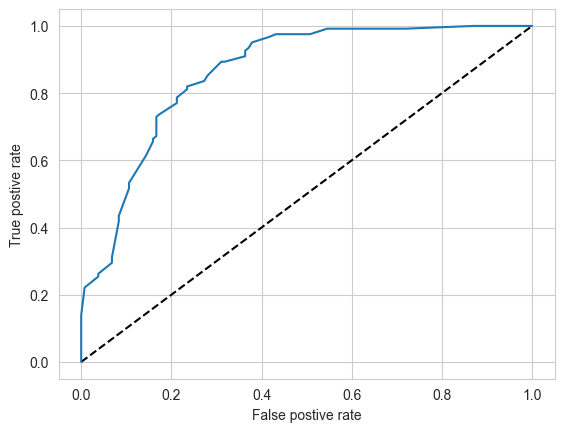

Auc Score :
 0.7816691505216096


In [344]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_model.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [345]:
import joblib
joblib.dump(Final_model,'Loan_Application_status.pkl')

['Loan_Application_status.pkl']